In [3]:
import os
try:
    if RUN: os.chdir(BASE_PATH)
except:
    BASE_PATH=os.getcwd()
RUN=True
os.chdir("../")
from conf import *
from scripts.dataset.dataset import *
import torch
from PIL import Image
from matplotlib import pyplot as plt
from scripts.metrics import compute_iou
from scripts.utilities.parse_config  import Config
import pandas as pd

In [4]:
pjoin=lambda lst: os.path.join(*lst)

In [5]:
folderpath=np.array([os.path.join("saves",f"UNet_1_EXP_{i}") for i in range(15)])

In [6]:
folderpath

array(['saves\\UNet_1_EXP_0', 'saves\\UNet_1_EXP_1',
       'saves\\UNet_1_EXP_2', 'saves\\UNet_1_EXP_3',
       'saves\\UNet_1_EXP_4', 'saves\\UNet_1_EXP_5',
       'saves\\UNet_1_EXP_6', 'saves\\UNet_1_EXP_7',
       'saves\\UNet_1_EXP_8', 'saves\\UNet_1_EXP_9',
       'saves\\UNet_1_EXP_10', 'saves\\UNet_1_EXP_11',
       'saves\\UNet_1_EXP_12', 'saves\\UNet_1_EXP_13',
       'saves\\UNet_1_EXP_14'], dtype='<U19')

In [7]:
def draw(res_path_list,log_file,linestyle="-",**ax,):
    for id,folder in enumerate(res_path_list):
    # folder=folderpath[0]
        conf=Config(pjoin([folder,"config.json"]))
        conf.get_param()
        df=pd.read_json(pjoin([conf.get_result_folder(),log_file]))
        draw_loss_acc_MA(id,df,conf,log_file,linestyle,**ax)



def draw_loss_acc_MA(id,df,conf,log_file,linestyle,**ax):
        for key in ["loss","accuracy"]:
            df[key+"_MA30"]=df[key].rolling(30).mean()

        for key in ["loss","accuracy"]:
            # df_train[[key]].plot(ax=ax[key],xlabel="batch",ylabel="loss")
            df[key+"_MA30"].plot(ax=ax[key],linewidth=2,linestyle=linestyle,color=f"C{id}",label=f"{log_file.split('.')[0]} {conf.get_aug_mode()}",title=key)
            ax[key].legend()

def draw_lr(res_path_list,log_file,linestyle="-",**ax,):
    for id,folder in enumerate(res_path_list):
    # folder=folderpath[0]
        conf=Config(pjoin([folder,"config.json"]))
        conf.get_param()
        df=pd.read_json(pjoin([conf.get_result_folder(),log_file]))
        draw_loss_acc_MA_lr(id,df,conf,log_file,linestyle,**ax)



def draw_loss_acc_MA_lr(id,df,conf,log_file,linestyle,**ax):
        for key in ["loss","accuracy"]:
            df[key+"_MA30"]=df[key].rolling(30).mean()

        for key in ["loss","accuracy"]:
            # df_train[[key]].plot(ax=ax[key],xlabel="batch",ylabel="loss")
            df[key+"_MA30"].plot(ax=ax[key],linewidth=1,linestyle=linestyle,color=f"C{id}",label=f"{log_file.split('.')[0]} {conf.get_lr()}",title=key)
            ax[key].legend()

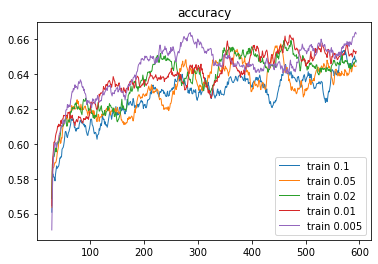

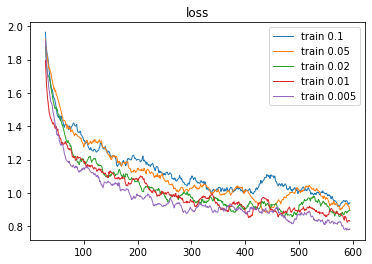

In [8]:
fig_acc=plt.figure()
ax_acc=fig_acc.subplots(1,1)

fig_loss=plt.figure()
ax_loss=fig_loss.subplots(1,1)
draw_lr(folderpath[[0,3,6,9,12]],log_file="train.json",linestyle="-",**{"loss":ax_loss,"accuracy":ax_acc})
# draw(folderpath[[-3,-2,-1]],log_file="val.json",**{"loss":ax_loss,"accuracy":ax_acc})

In [46]:
def get_df(res_path_list,log_file):
    df_total=[]
    for id,folder in enumerate(res_path_list):
    # folder=folderpath[0]
        conf=Config(pjoin([folder,"config.json"]))
        df=pd.read_json(pjoin([folder,"res",log_file])).join(pd.DataFrame.from_dict([conf.get_param()]),how="cross")
        df["model"]=conf.get_model_name()
        df=df.rename_axis('minibatch').reset_index()
        df_total.append(df)
        # print(df)
    return pd.concat(df_total,axis=0)

In [47]:
folderpath=list(map(lambda x: pjoin(["saves",x]),[
    "UNet_1_EXP_12",
    "UNet_1_EXP_13",
    "UNet_1_EXP_14",
    "UNet_2_EXP_12",
    "UNet_2_EXP_13",
    "UNet_2_EXP_14",
    "UNet_2_1_EXP_12",
    "UNet_2_1_EXP_13",
    "UNet_2_1_EXP_14",
]))

In [48]:
folderpath

['saves\\UNet_1_EXP_12',
 'saves\\UNet_1_EXP_13',
 'saves\\UNet_1_EXP_14',
 'saves\\UNet_2_EXP_12',
 'saves\\UNet_2_EXP_13',
 'saves\\UNet_2_EXP_14',
 'saves\\UNet_2_1_EXP_12',
 'saves\\UNet_2_1_EXP_13',
 'saves\\UNet_2_1_EXP_14']

model
UNet_1      AxesSubplot(0.125,0.125;0.775x0.755)
UNet_2      AxesSubplot(0.125,0.125;0.775x0.755)
UNet_2_1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

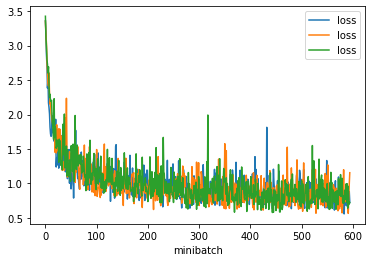

In [49]:
df=get_df(folderpath,log_file="train.json")
df_temp=df
fig=plt.figure()
ax=fig.subplots(1,1)
df_temp.groupby("learning_rate").get_group(0.005)[["loss","aug_mode","model","accuracy","minibatch"]].groupby("aug_mode").get_group("None")[["loss","minibatch","model"]].groupby("model").plot(ax=ax,y="loss",x="minibatch")

In [50]:
# fig=plt.figure()
# ax=fig.subplots(1,1)
# for aug_mode in ["None","Only","Both"]:
#     df_temp=(df.groupby("aug_mode").get_group(aug_mode).groupby("learning_rate").get_group(0.005).groupby("epoch").get_group(1))
#     df_temp.set_index("minibatch",inplace=True)
#     print
#     df_temp["accuracy"].rolling(30).mean().plot(ax=ax,label=aug_mode,xlabel="minibatch",ylabel="accuracy")
# ax.legend()

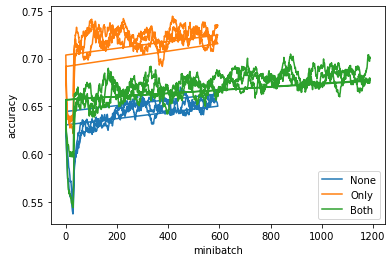

In [51]:
fig=plt.figure()
ax=fig.subplots(1,1)
for aug_mode in ["None","Only","Both"]:
    df_temp=(df.groupby("aug_mode").get_group(aug_mode).groupby("learning_rate").get_group(0.005).groupby("epoch").get_group(1))
    df_temp.set_index("minibatch",inplace=True)
    df_temp["accuracy"].rolling(30).mean().plot(ax=ax,label=aug_mode,xlabel="minibatch",ylabel="accuracy")
ax.legend()

In [52]:
df

,minibatch,epoch,loss,accuracy,learning_rate,epochs,batch_size,aug_mode,save_inter_model,model
0,0,1,3.361051,0.015435,0.005,1,5,None,False,UNet_1
1,1,1,3.199844,0.219392,0.005,1,5,None,False,UNet_1
2,2,1,2.872213,0.439093,0.005,1,5,None,False,UNet_1
3,3,1,2.709094,0.541341,0.005,1,5,None,False,UNet_1
4,4,1,2.383160,0.464348,0.005,1,5,None,False,UNet_1
...,...,...,...,...,...,...,...,...,...,...
1185,1185,1,0.858465,0.637745,0.005,1,5,Both,False,UNet_2_1
1186,1186,1,1.570806,0.678436,0.005,1,5,Both,False,UNet_2_1
1187,1187,1,0.996577,0.687212,0.005,1,5,Both,False,UNet_2_1
1188,1188,1,0.856407,0.737011,0.005,1,5,Both,False,UNet_2_1


AxesSubplot(0.125,0.125;0.775x0.755)


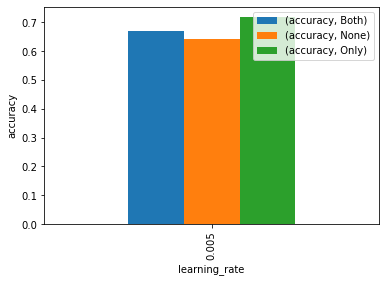

In [53]:
fig=plt.figure()
ax=fig.subplots(1,1)
# for id,aug_mode in enumerate(["None","Only","Both"]):
df_temp=(df.groupby("epoch").get_group(1))
# df_temp.set_index("learning_rate",inplace=True)
df_temp=df_temp[["accuracy","learning_rate","aug_mode"]].groupby(["aug_mode","learning_rate"]).agg("mean").unstack(0).plot.bar(ax=ax,label=aug_mode,xlabel="learning_rate",ylabel="accuracy")
print(df_temp)
# .plot(ax=ax,label=aug_mode,xlabel="learning_rate",ylabel="accuracy")
# print(df_temp)
    
ax.legend()

# Draw accuracy and loss

In [54]:
df_temp=(df.groupby("aug_mode").get_group(aug_mode).groupby("minibatch").get_group(400).groupby("epoch").get_group(1))
df_temp.set_index("learning_rate")

,minibatch,epoch,loss,accuracy,epochs,batch_size,aug_mode,save_inter_model,model
learning_rate,,,,,,,,,
0.005,400,1,0.853552,0.676151,1,5,Both,False,UNet_1
0.005,400,1,1.460036,0.588200,1,5,Both,False,UNet_2
0.005,400,1,1.476934,0.617628,1,5,Both,False,UNet_2_1


In [55]:
df_temp

,minibatch,epoch,loss,accuracy,learning_rate,epochs,batch_size,aug_mode,save_inter_model,model
400,400,1,0.853552,0.676151,0.005,1,5,Both,False,UNet_1
400,400,1,1.460036,0.588200,0.005,1,5,Both,False,UNet_2
400,400,1,1.476934,0.617628,0.005,1,5,Both,False,UNet_2_1


# Baseline

In [72]:
# baseline_folder=list(map(lambda x: pjoin(["saves",x]),
# [
#     r"EXP7_unet_0.01_none",
#     r"EXP7_unet_0.01_only",
#     r"EXP7_unet_0.01_both",
#     r"EXP7_unet_0.005_none",
#     r"UNet-lr-0p005-AUGMODE_Only-EXP_0",
#     r"EXP7_unet_0.005_both",
#     r"UNet-lr-0p0002-AUGMODE_None-EXP_1",
#     r"UNet-lr-0p0002-AUGMODE_Only-EXP_1",
#     r"UNet-lr-0p0002-AUGMODE_Both-EXP_1",
# ]))
# print(baseline_folder)

['saves\\EXP7_unet_0.01_none', 'saves\\EXP7_unet_0.01_only', 'saves\\EXP7_unet_0.01_both', 'saves\\EXP7_unet_0.005_none', 'saves\\UNet-lr-0p005-AUGMODE_Only-EXP_0', 'saves\\EXP7_unet_0.005_both', 'saves\\UNet-lr-0p0002-AUGMODE_None-EXP_1', 'saves\\UNet-lr-0p0002-AUGMODE_Only-EXP_1', 'saves\\UNet-lr-0p0002-AUGMODE_Both-EXP_1']


In [176]:
baseline_folder=list(map(lambda x: pjoin(["saves",x]),
[
    r"UNet_Pos-lr-0p0002-AUGMODE_None-EXP_2",
    r"UNet_Pos-lr-0p0002-AUGMODE_Only-EXP_2",
    r"UNet_Pos-lr-0p0002-AUGMODE_Both-EXP_2",
    
]))

learning_rate
0.0002    AxesSubplot(0.125,0.125;0.775x0.755)
Name: accuracy, dtype: object

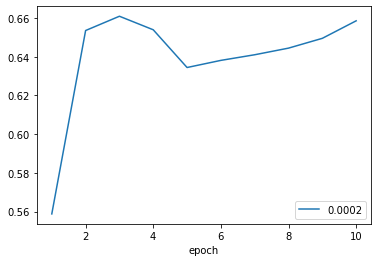

In [177]:
df_baseline=get_df(baseline_folder,log_file="val.json")
acc_baseline=df_baseline.groupby("aug_mode").get_group("None")[["accuracy","epoch","learning_rate"]].set_index("epoch")
acc_baseline.groupby("learning_rate")["accuracy"].plot(legend=True)

In [178]:
# acc with respect to epoch for different lr

learning_rate
0.0002    AxesSubplot(0.125,0.125;0.775x0.755)
Name: accuracy, dtype: object

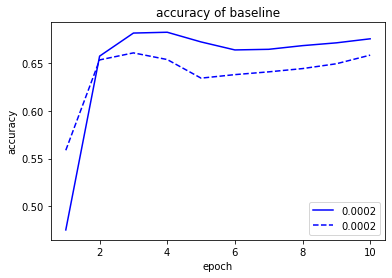

In [179]:
fig=plt.figure()
ax=fig.subplots(1,1)
df_baseline=get_df(baseline_folder,log_file="train.json")
acc_baseline_1=df_baseline.groupby("aug_mode").get_group("None")[["accuracy","epoch","learning_rate"]].groupby(["learning_rate","epoch"]).mean().reset_index(0)
acc_baseline_1.groupby("learning_rate")["accuracy"].plot(ax=ax,style={0.01:"green",0.005:"orange",0.0002:"blue"},legend=True,ylabel="accuracy",title="accuracy on train set")

df_baseline=get_df(baseline_folder,log_file="val.json")
acc_baseline_1=df_baseline.groupby("aug_mode").get_group("None")[["accuracy","epoch","learning_rate"]].groupby(["learning_rate","epoch"]).mean().reset_index(0)
acc_baseline_1.groupby("learning_rate")["accuracy"].plot(ax=ax,style={0.01:"green",0.005:"orange",0.0002:"blue"},linestyle="--",legend=True,ylabel="accuracy",title="accuracy of baseline")
# acc_baseline.groupby("learning_rate")["accuracy"].plot(legend=True)

learning_rate
0.0002    AxesSubplot(0.125,0.125;0.775x0.755)
Name: loss, dtype: object

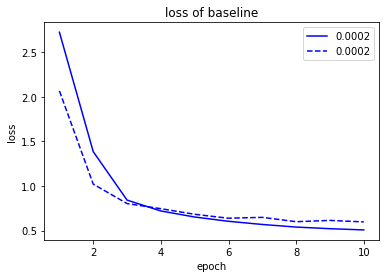

In [180]:
fig=plt.figure()
ax=fig.subplots(1,1)
df_baseline=get_df(baseline_folder,log_file="train.json")
acc_baseline_1=df_baseline.groupby("aug_mode").get_group("None")[["loss","epoch","learning_rate"]].groupby(["learning_rate","epoch"]).mean().reset_index(0)
acc_baseline_1.groupby("learning_rate")["loss"].plot(ax=ax,style={0.01:"green",0.005:"orange",0.0002:"blue"},legend=True,ylabel="loss",title="loss on train set")

df_baseline=get_df(baseline_folder,log_file="val.json")
acc_baseline_1=df_baseline.groupby("aug_mode").get_group("None")[["loss","epoch","learning_rate"]].groupby(["learning_rate","epoch"]).mean().reset_index(0)
acc_baseline_1.groupby("learning_rate")["loss"].plot(ax=ax,style={0.01:"green",0.005:"orange",0.0002:"blue"},linestyle="--",legend=True,ylabel="loss",title="loss of baseline")
# # acc_baseline.groupby("learning_rate")["accuracy"].plot(legend=True)

# Draw with respect to aug_mode

In [181]:
def draw_with_respect_to_aug_mode(key,folder,ax):
    colorstyle={"None":"green","Only":"orange","Both":"blue"}
    df=get_df(folder,log_file="train.json")
    df=df.groupby("learning_rate").get_group(0.0002)[[key,"epoch","aug_mode"]].groupby(["aug_mode","epoch"]).mean().reset_index(0)
    df.groupby("aug_mode")[key].plot(ax=ax,style=colorstyle,legend=True,ylabel=key,title=key)

    df=get_df(folder,log_file="val.json")
    df=df.groupby("learning_rate").get_group(0.0002)[[key,"epoch","aug_mode"]].groupby(["aug_mode","epoch"]).mean().reset_index(0)
    df.groupby("aug_mode")[key].plot(ax=ax,style=colorstyle,linestyle="--",legend=True,ylabel=key,title=key)

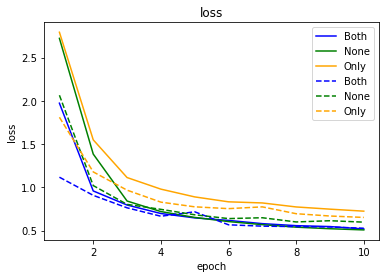

In [182]:
fig=plt.figure()
ax=fig.subplots(1,1)
draw_with_respect_to_aug_mode("loss",baseline_folder,ax)

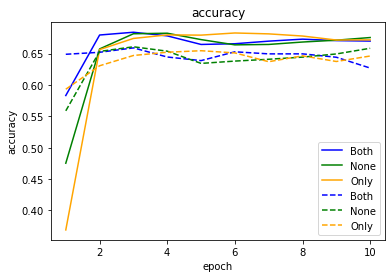

In [183]:
fig=plt.figure()
ax=fig.subplots(1,1)
draw_with_respect_to_aug_mode("accuracy",baseline_folder,ax)